# 1. Project description

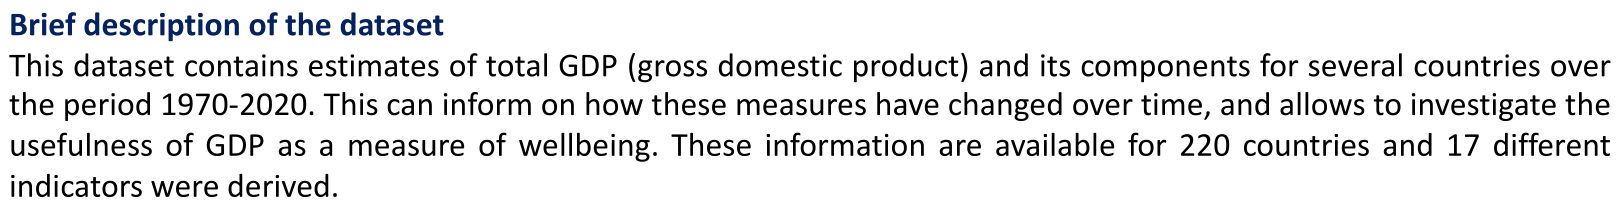

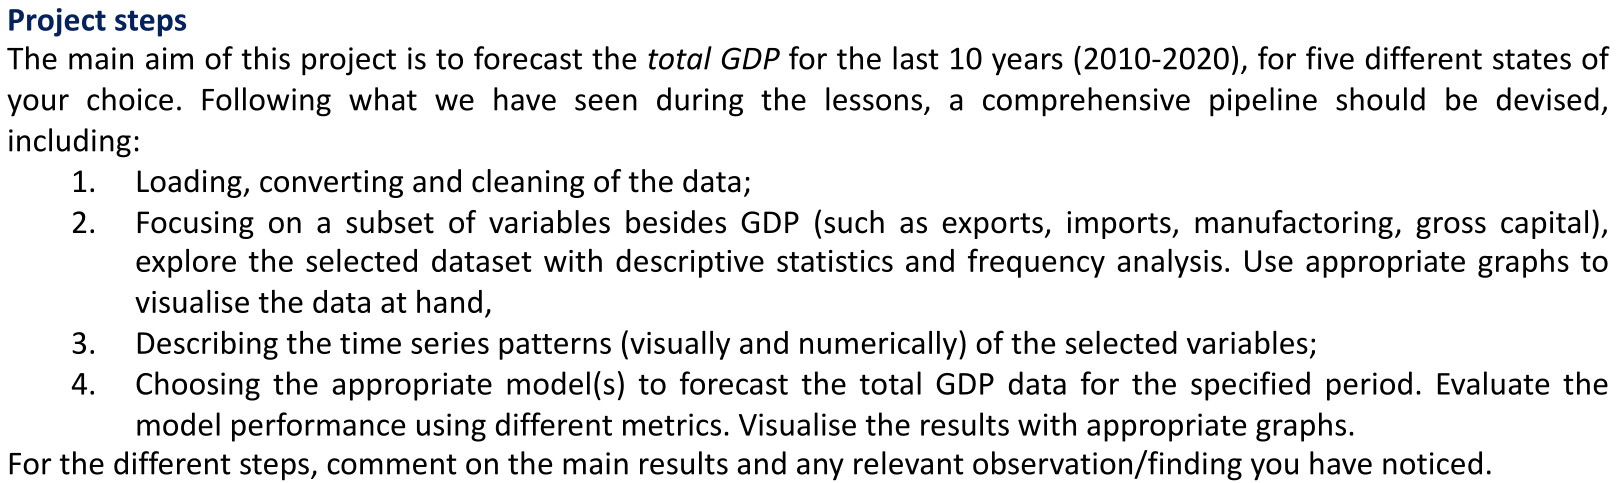

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy.fft import fft
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df_iniziale = pd.read_csv('GDPconstant-USD-countries.csv', index_col = 'CountryID')

df, valid_nations = f.preprocess_df(df_iniziale)

In [3]:
df.head(3)

,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryID,,,,,,,,,,,,,,,,,,,,,
8,Albania,Final consumption expenditure,2.035896e+09,2.117670e+09,2.202717e+09,2.290083e+09,2.383229e+09,2.478907e+09,2.573526e+09,2.686010e+09,...,9.829417e+09,9.841766e+09,1.003528e+10,1.036170e+10,1.045381e+10,1.070931e+10,1.098068e+10,1.129870e+10,1.165178e+10,1.142641e+10
8,Albania,Household consumption expenditure (including N...,1.952117e+09,2.030508e+09,2.112067e+09,2.195867e+09,2.285082e+09,2.376931e+09,2.467748e+09,2.575058e+09,...,8.662830e+09,8.673986e+09,8.833231e+09,9.081697e+09,9.188655e+09,9.383914e+09,9.613148e+09,9.922240e+09,1.023528e+10,1.002502e+10
8,Albania,General government final consumption expenditure,8.830853e+07,9.187170e+07,9.554977e+07,9.931108e+07,1.034472e+08,1.074913e+08,1.115066e+08,1.169159e+08,...,1.167228e+09,1.168429e+09,1.202395e+09,1.279283e+09,1.265160e+09,1.324583e+09,1.366461e+09,1.376212e+09,1.416324e+09,1.400874e+09


In [4]:
nation_list = f.create_nation_list(valid_nations, df)
nation_list

['Finland', 'Argentina', 'Belgium', 'Philippines', 'Germany']

Default target countries = Finland, Argentina, Belgium, Canada, South Africa

Default target variables = Import, Export, Manufacturing, Gross Capital

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 8 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1921 non-null   object 
 1   IndicatorName  1921 non-null   object 
 2   1970           1921 non-null   float64
 3   1971           1921 non-null   float64
 4   1972           1921 non-null   float64
 5   1973           1921 non-null   float64
 6   1974           1921 non-null   float64
 7   1975           1921 non-null   float64
 8   1976           1921 non-null   float64
 9   1977           1921 non-null   float64
 10  1978           1921 non-null   float64
 11  1979           1921 non-null   float64
 12  1980           1921 non-null   float64
 13  1981           1921 non-null   float64
 14  1982           1921 non-null   float64
 15  1983           1921 non-null   float64
 16  1984           1921 non-null   float64
 17  1985           1921 non-null   float64
 18  1986          

In [6]:
df_1 = df[df['Country'] == nation_list[0]]
df_1 = f.create_df(df_1)
df_2 = df[df['Country'] == nation_list[1]]
df_2 = f.create_df(df_2)
df_3 = df[df['Country'] == nation_list[2]]
df_3 = f.create_df(df_3)
df_4 = df[df['Country'] == nation_list[3]]
df_4 = f.create_df(df_4)
df_5 = df[df['Country'] == nation_list[4]]
df_5 = f.create_df(df_5)

df_list = [df_1, df_2, df_3, df_4, df_5]

In [7]:
for idx, df in enumerate(df_list):
    print(nation_list[idx])
    print(df.info())
    print('----------------------------------------------')

Finland
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None
----------------------------------------------
Argentina
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1970-01-01 to 2020-01-01
Freq: YS-JAN
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)


Change from object type to float type

In [8]:
df_1 = df_1.astype(float)
df_2 = df_2.astype(float)
df_3 = df_3.astype(float)
df_4 = df_4.astype(float)
df_5 = df_5.astype(float)

# 4. Descriptive statistics

In [9]:
for df in df_list:
    display(df.describe())

,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.000000e+01,5.100000e+01
top,1.066242e+10,1.400966e+10,8.941799e+09,3.074888e+10,7.886801e+10
freq,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,4.900000e+01,5.100000e+01,5.100000e+01,5.000000e+01,5.100000e+01
top,1.569482e+10,7.042927e+09,4.501110e+10,4.372695e+10,2.464847e+11
freq,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,5.687864e+10,5.747039e+10,2.290084e+10,3.976281e+10,1.725902e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,5.110450e+09,6.125257e+09,1.239380e+10,8.307424e+09,5.073915e+10
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,1.533990e+11,1.618174e+11,3.625062e+11,4.146930e+11,1.398222e+12
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Check for the variable with the highest correlation with GDP

In [10]:
corr_1 = df_1.corr()
corr_2 = df_2.corr()
corr_3 = df_3.corr()
corr_4 = df_4.corr()
corr_5 = df_5.corr()

corr_list = [corr_1, corr_2, corr_3, corr_4, corr_5]

max_list = []
f.highest_corr_variable(corr_list, max_list, nation_list)

,Highest correlation variable
Finland,Exports
Argentina,Imports
Belgium,Exports
Philippines,Manufacturing
Germany,Manufacturing


# 5. Descriptive plots

## 5.1 Line-plot 

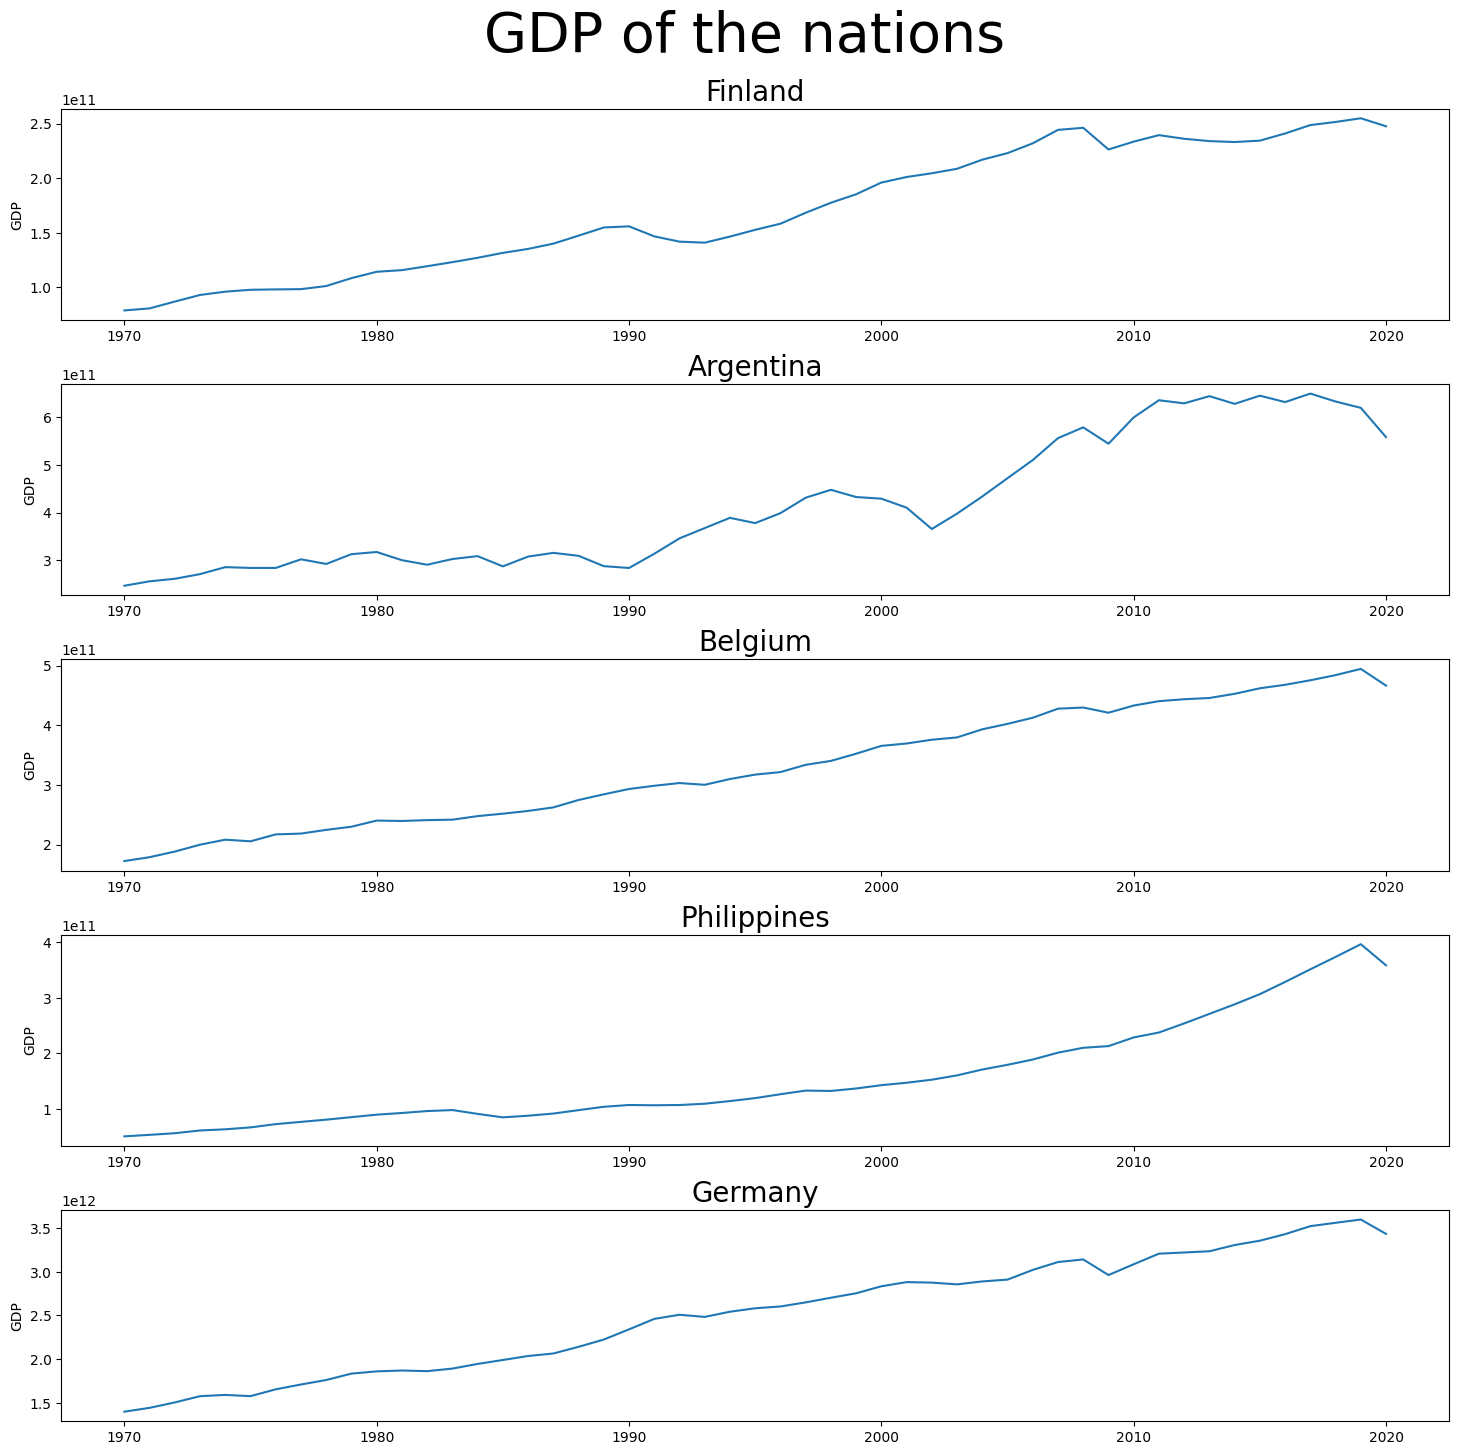

In [11]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

for idx, df in enumerate(df_list):
    sns.lineplot(df['GDP'], ax = ax[idx])
    ax[idx].set_title(nation_list[idx], fontsize = 20)

plt.show()

GDP has similar trend for all the states

## 5.2 Correlation heatmap

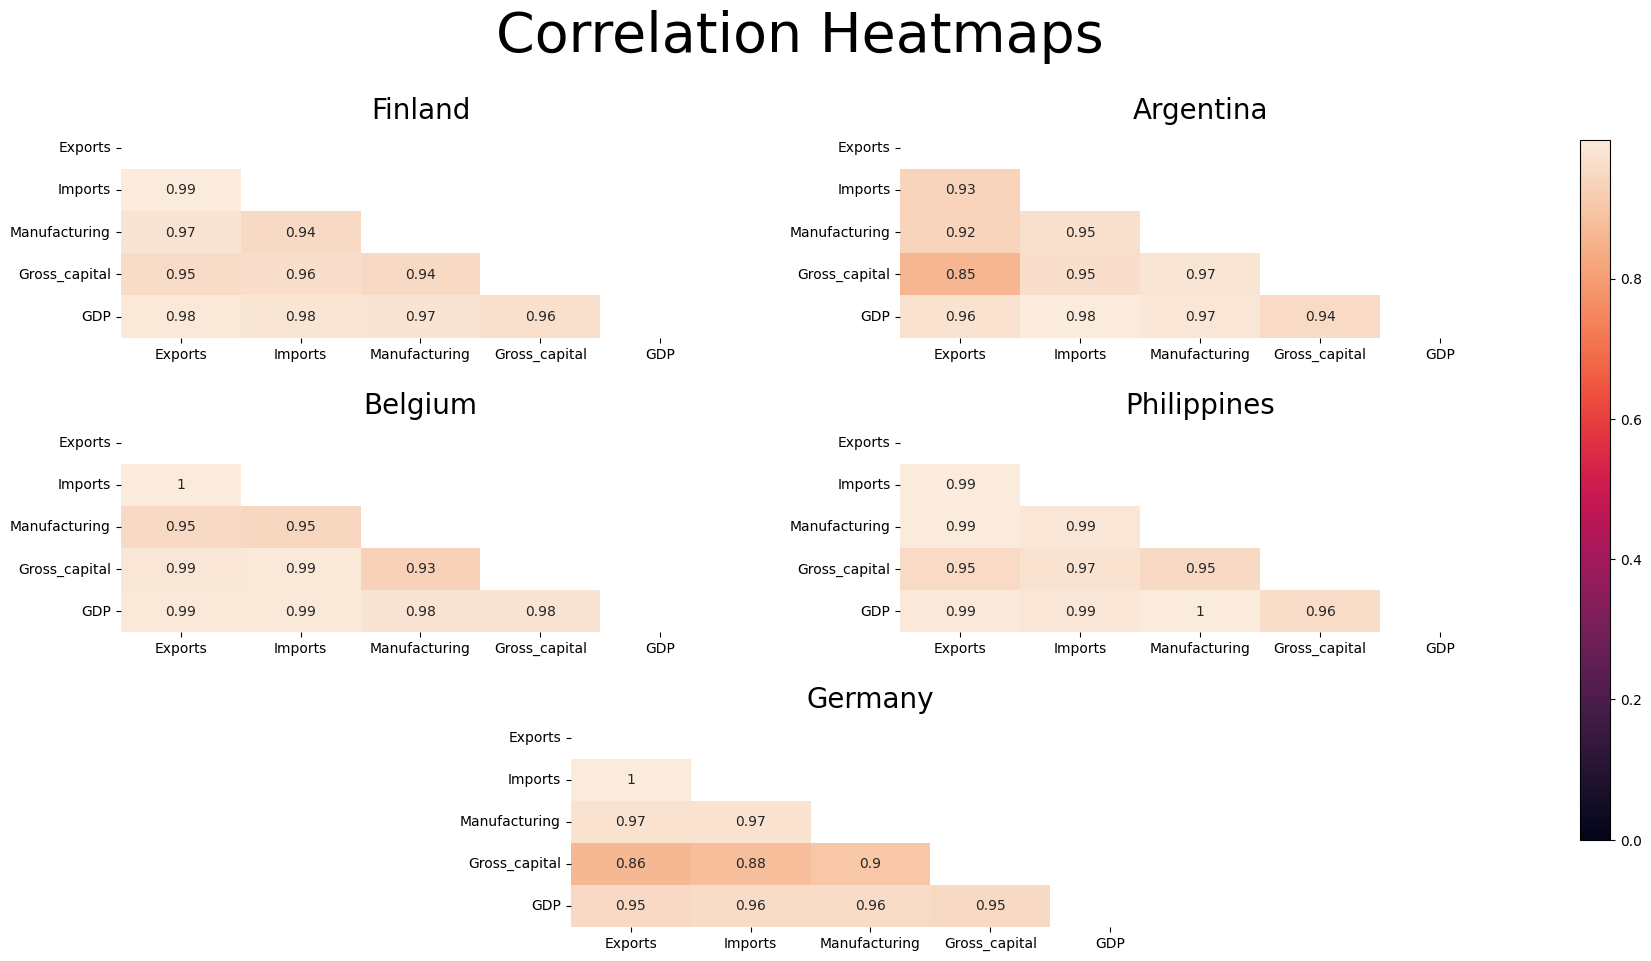

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_1)
sns.heatmap(corr_1,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_3)
sns.heatmap(corr_3, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_4)
sns.heatmap(corr_4, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_5)
sns.heatmap(corr_5, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## 5.3 Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


,0,1
Finland,Manufacturing,Gross_capital
Argentina,Exports,Gross_capital
Belgium,Manufacturing,Gross_capital
Philippines,Manufacturing,Gross_capital
Germany,Exports,Gross_capital


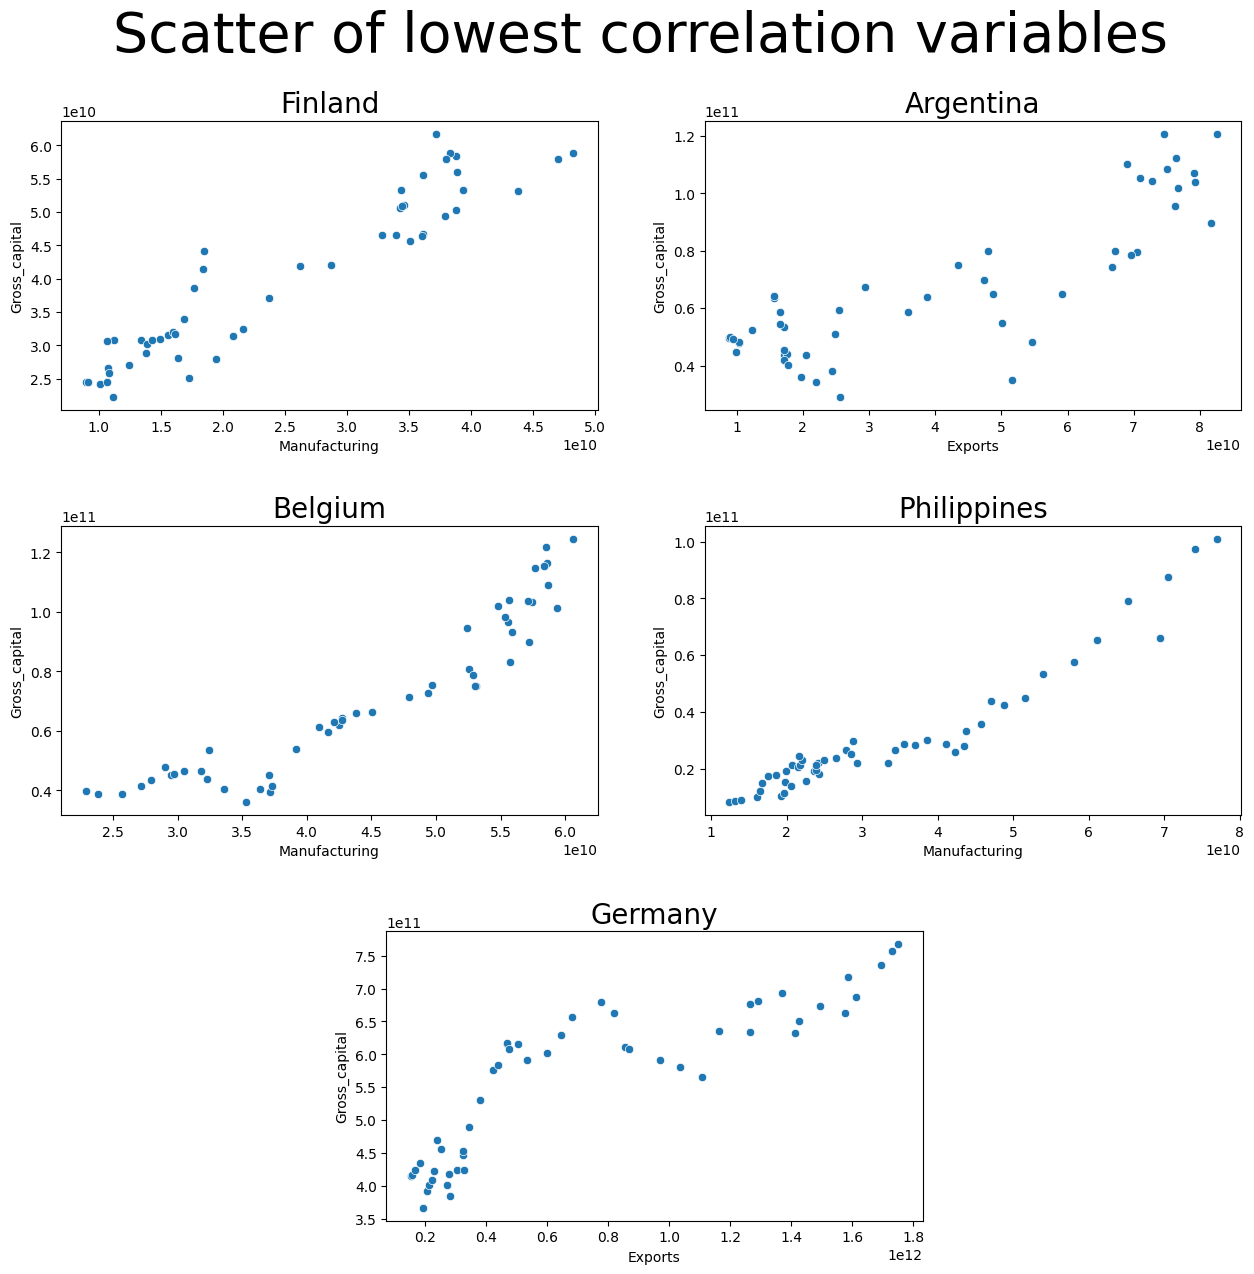

In [13]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_1)
low_corr_list.append(idx)
sns.scatterplot(x = df_1[idx[0]], y = df_1[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_2)
low_corr_list.append(idx)
sns.scatterplot(x = df_2[idx[0]], y = df_2[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_3)
low_corr_list.append(idx)
sns.scatterplot(x = df_3[idx[0]], y = df_3[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_4)
low_corr_list.append(idx)
sns.scatterplot(x = df_4[idx[0]], y = df_4[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_5)
low_corr_list.append(idx)
sns.scatterplot(x = df_5[idx[0]], y = df_5[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = nation_list))

plt.show()

## 5.4 Lag-plot

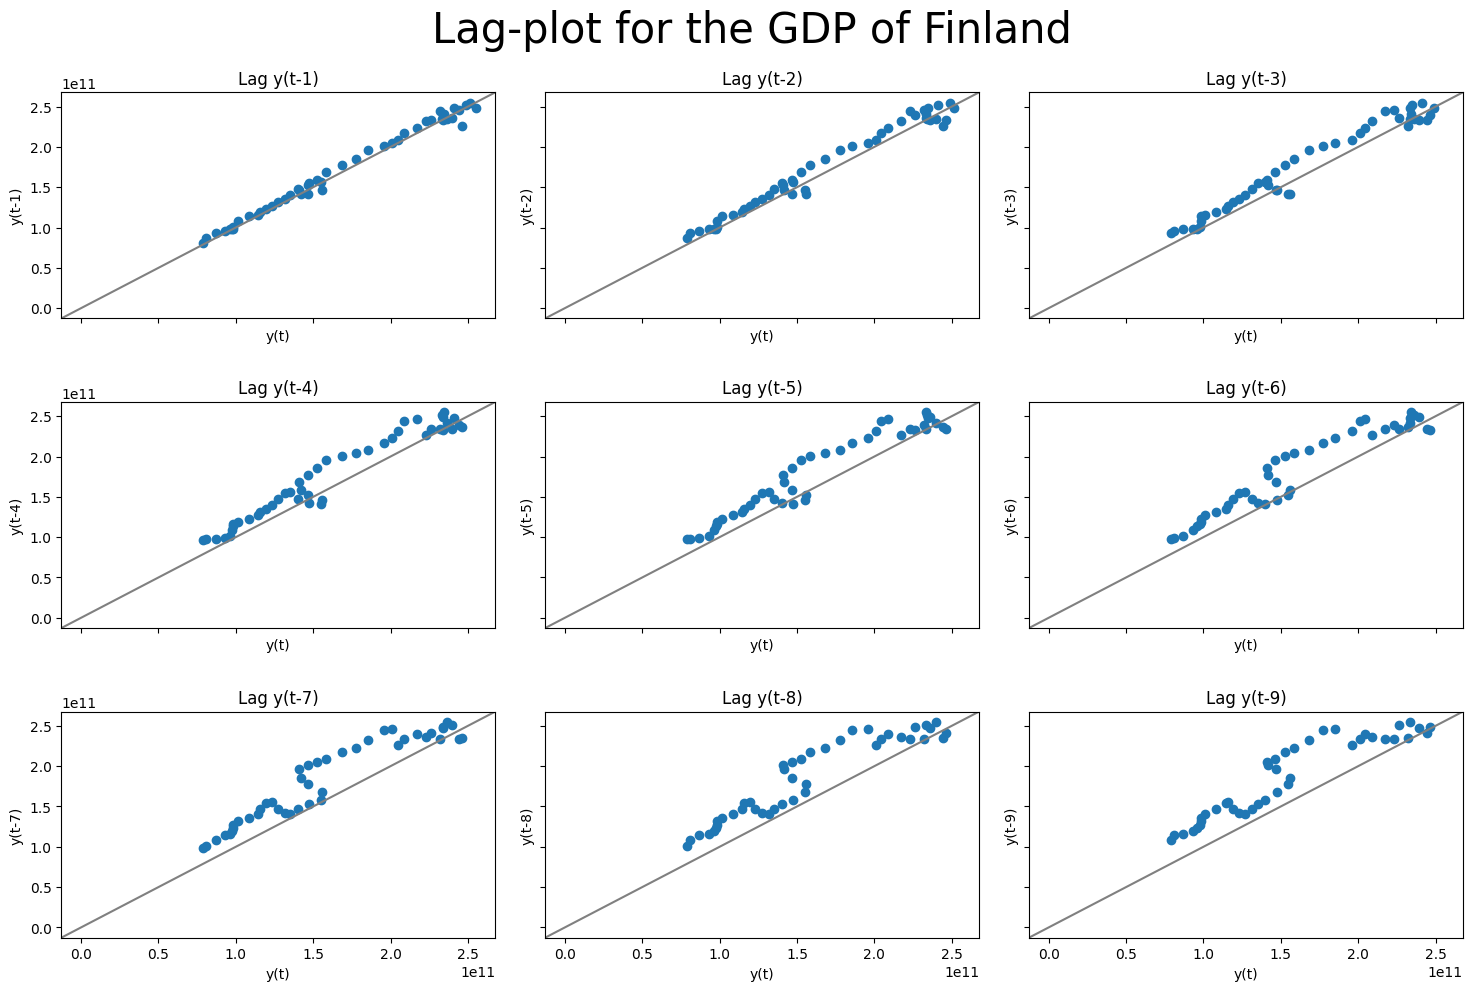

In [14]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle(f'Lag-plot for the GDP of {nation_list[0]}', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_1['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## 5.5 ACF and PACF of GDP

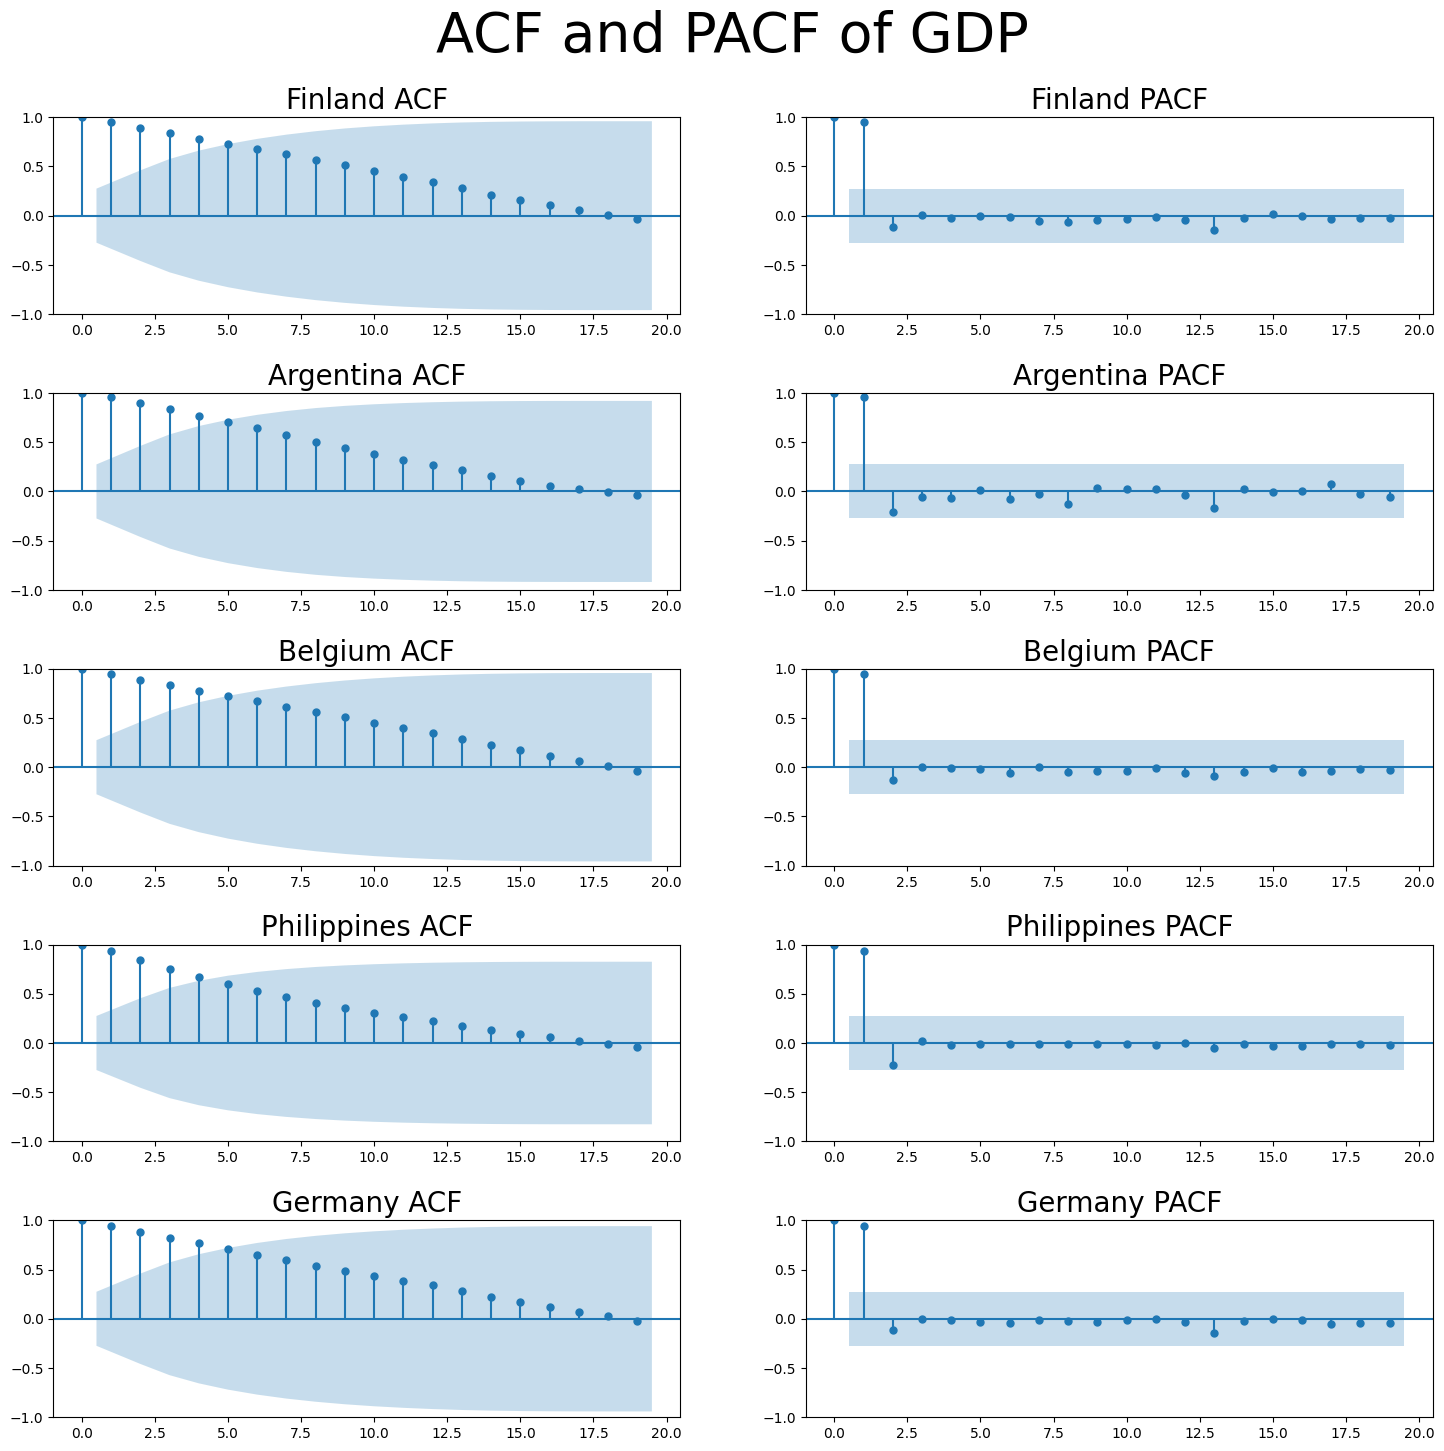

In [15]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df['GDP'], lags = 19, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df['GDP'], lags = 19, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 6. Split data in train and test 

In [16]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

In [17]:
df_train_test['Finland'][0]

,Exports,Imports,Manufacturing,Gross_capital,GDP
1970-01-01,1.066242e+10,1.400966e+10,8.941799e+09,2.446133e+10,7.886801e+10
1971-01-01,1.053922e+10,1.398533e+10,9.089779e+09,2.455488e+10,8.072686e+10
1972-01-01,1.206538e+10,1.468670e+10,1.011720e+10,2.418546e+10,8.697148e+10
1973-01-01,1.293659e+10,1.656130e+10,1.076988e+10,2.660041e+10,9.304542e+10
1974-01-01,1.295091e+10,1.763697e+10,1.124927e+10,3.079257e+10,9.605686e+10
1975-01-01,1.124913e+10,1.807734e+10,1.067282e+10,3.071314e+10,9.779059e+10
1976-01-01,1.286855e+10,1.781702e+10,1.077466e+10,2.580973e+10,9.812737e+10
1977-01-01,1.493299e+10,1.750872e+10,1.067471e+10,2.459320e+10,9.836239e+10
1978-01-01,1.609437e+10,1.681773e+10,1.114801e+10,2.228288e+10,1.012343e+11
1979-01-01,1.764758e+10,1.991999e+10,1.241633e+10,2.708685e+10,1.084441e+11


# 7. Frequency analysis

## 7.1 Fast Fourier Transform

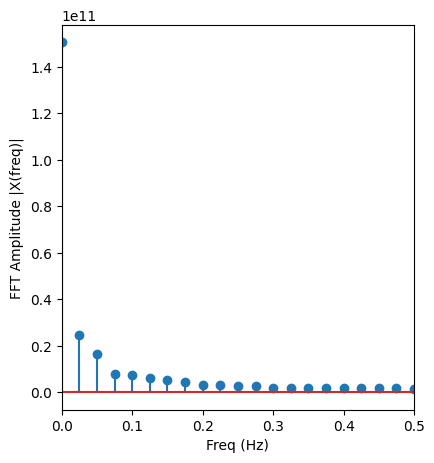

In [18]:
X = fft(df_train_test[nation_list[0]][0]['GDP'])
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## 7.2 Power-spectral density

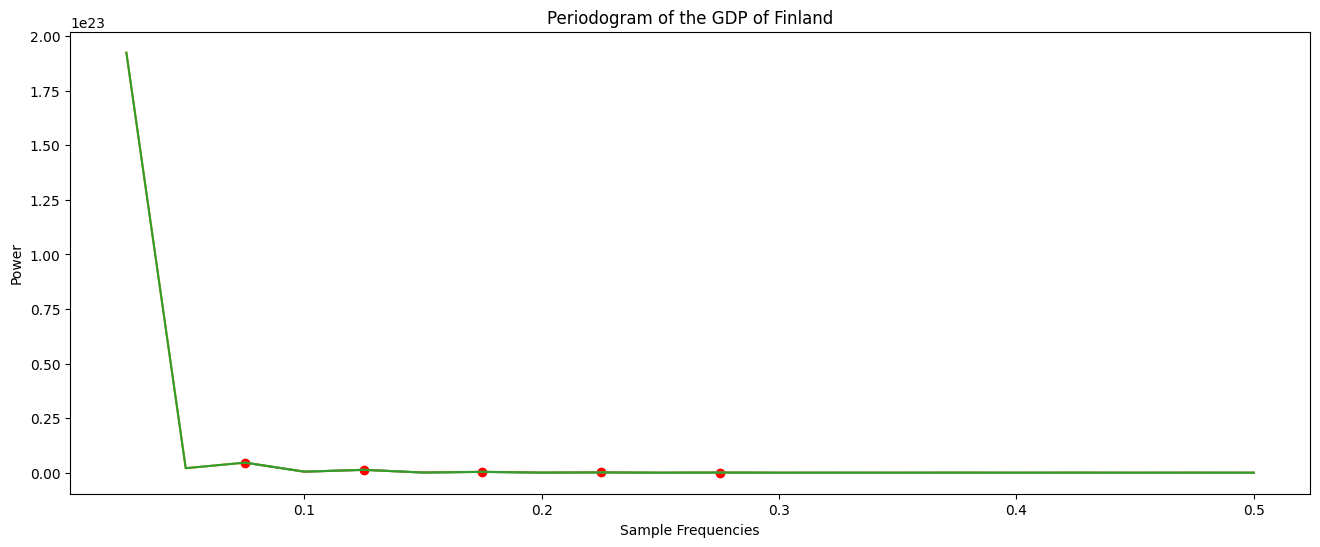

,Frequency,Density,Period
0,0.075,4.616394e+21,13.333333
1,0.125,1.323946e+21,8.000000
2,0.175,3.951268e+20,5.714286
3,0.225,1.510196e+20,4.444444
4,0.275,8.303045e+19,3.636364


----------------------------------------------


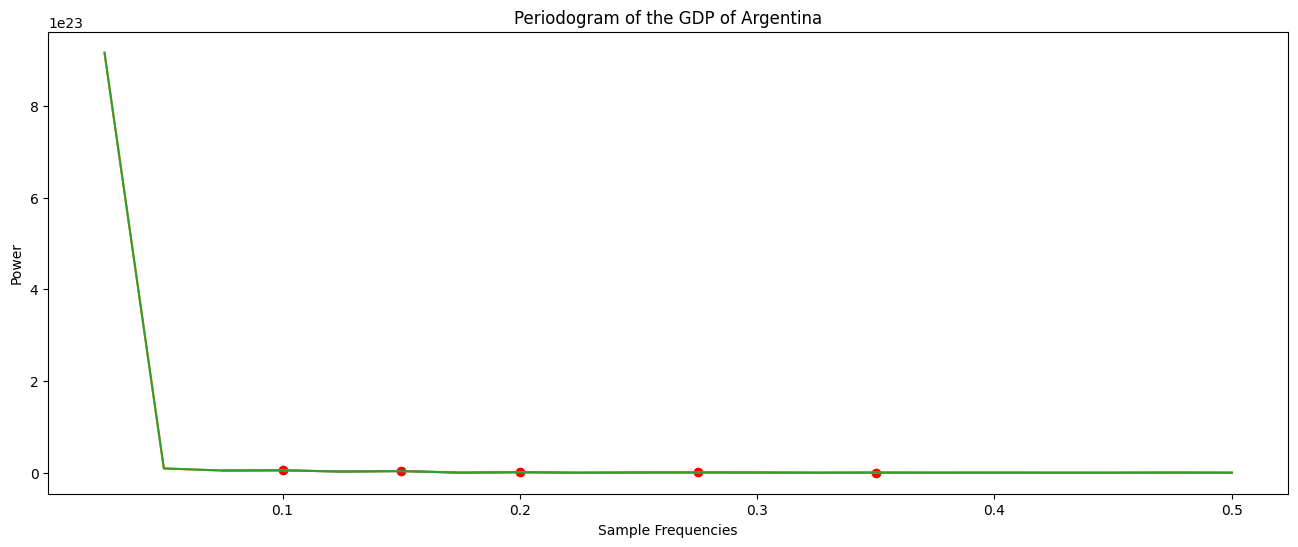

,Frequency,Density,Period
0,0.100,5.293598e+21,10.000000
1,0.150,3.597535e+21,6.666667
2,0.200,1.106188e+21,5.000000
3,0.275,6.324115e+20,3.636364
4,0.350,2.649296e+20,2.857143


----------------------------------------------


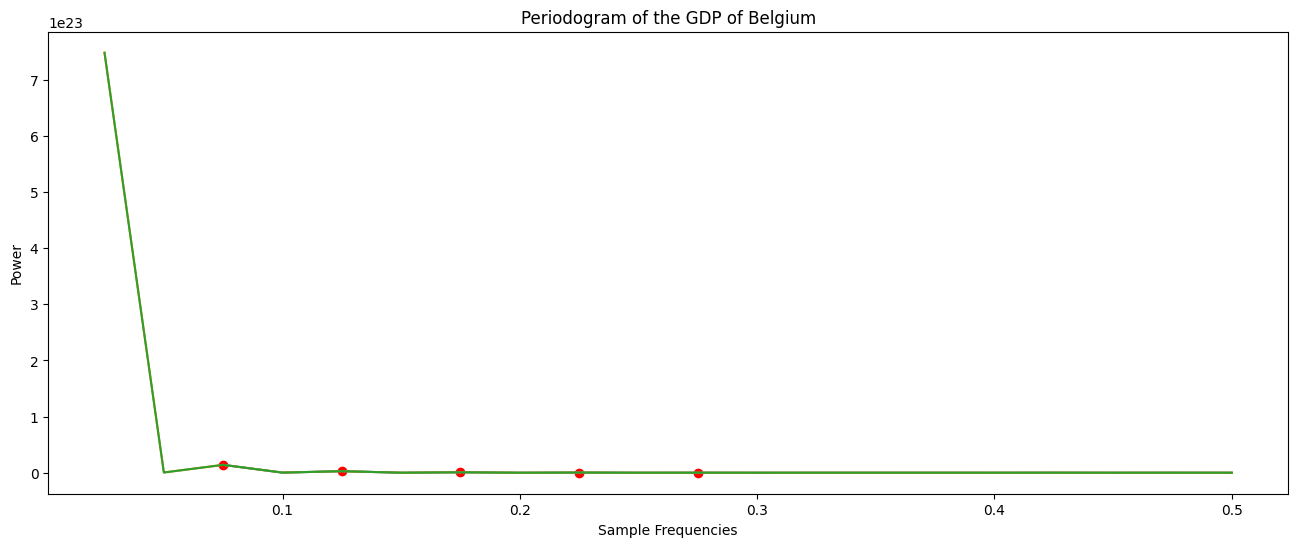

,Frequency,Density,Period
0,0.075,1.400916e+22,13.333333
1,0.125,2.737009e+21,8.000000
2,0.175,7.785270e+20,5.714286
3,0.225,3.089728e+20,4.444444
4,0.275,9.780574e+19,3.636364


----------------------------------------------


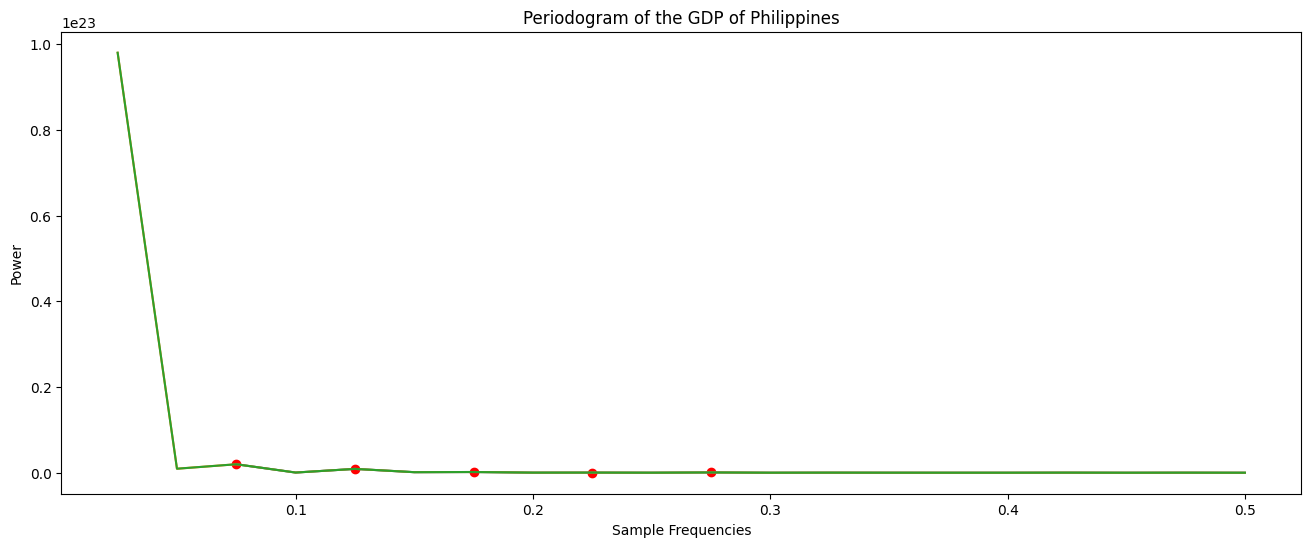

,Frequency,Density,Period
0,0.075,1.976139e+21,13.333333
1,0.125,8.942455e+20,8.000000
2,0.175,1.669056e+20,5.714286
3,0.225,3.515580e+19,4.444444
4,0.275,6.814486e+19,3.636364


----------------------------------------------


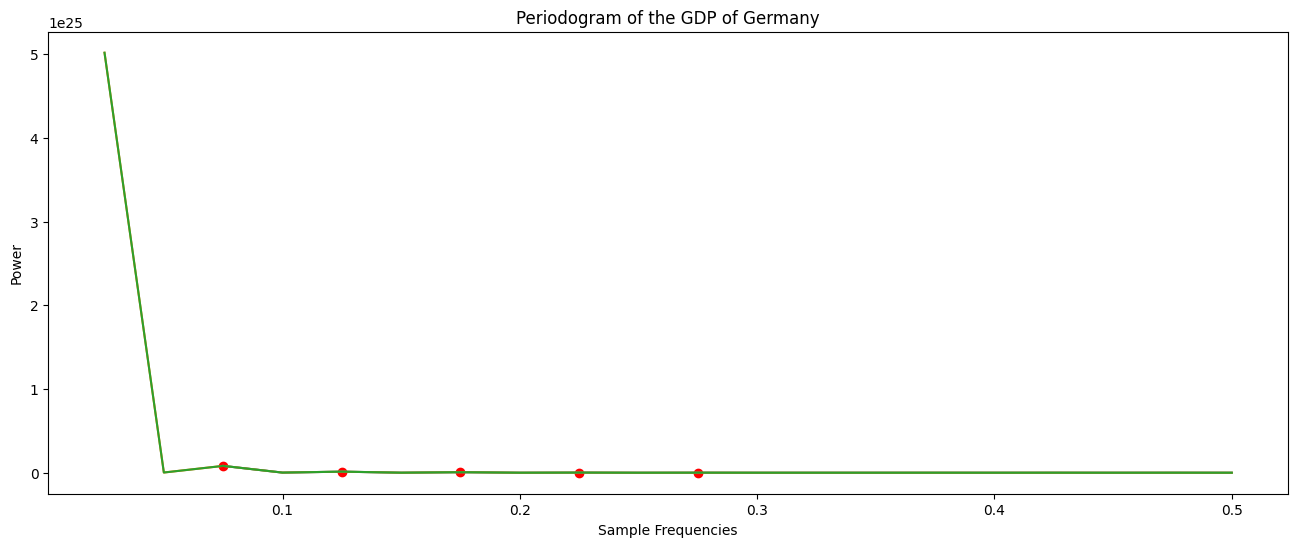

,Frequency,Density,Period
0,0.075,8.167657e+23,13.333333
1,0.125,1.284873e+23,8.000000
2,0.175,6.251032e+22,5.714286
3,0.225,1.675840e+22,4.444444
4,0.275,6.289421e+21,3.636364


----------------------------------------------


In [19]:
seasons_list = []

for nation in nation_list:
    top_season = f.spd(nation, df_train_test, Fs)
    seasons_list.append(top_season)
    print('----------------------------------------------')

seasons_list = [round(x) for x in seasons_list]

# 8. Seasonal decompose

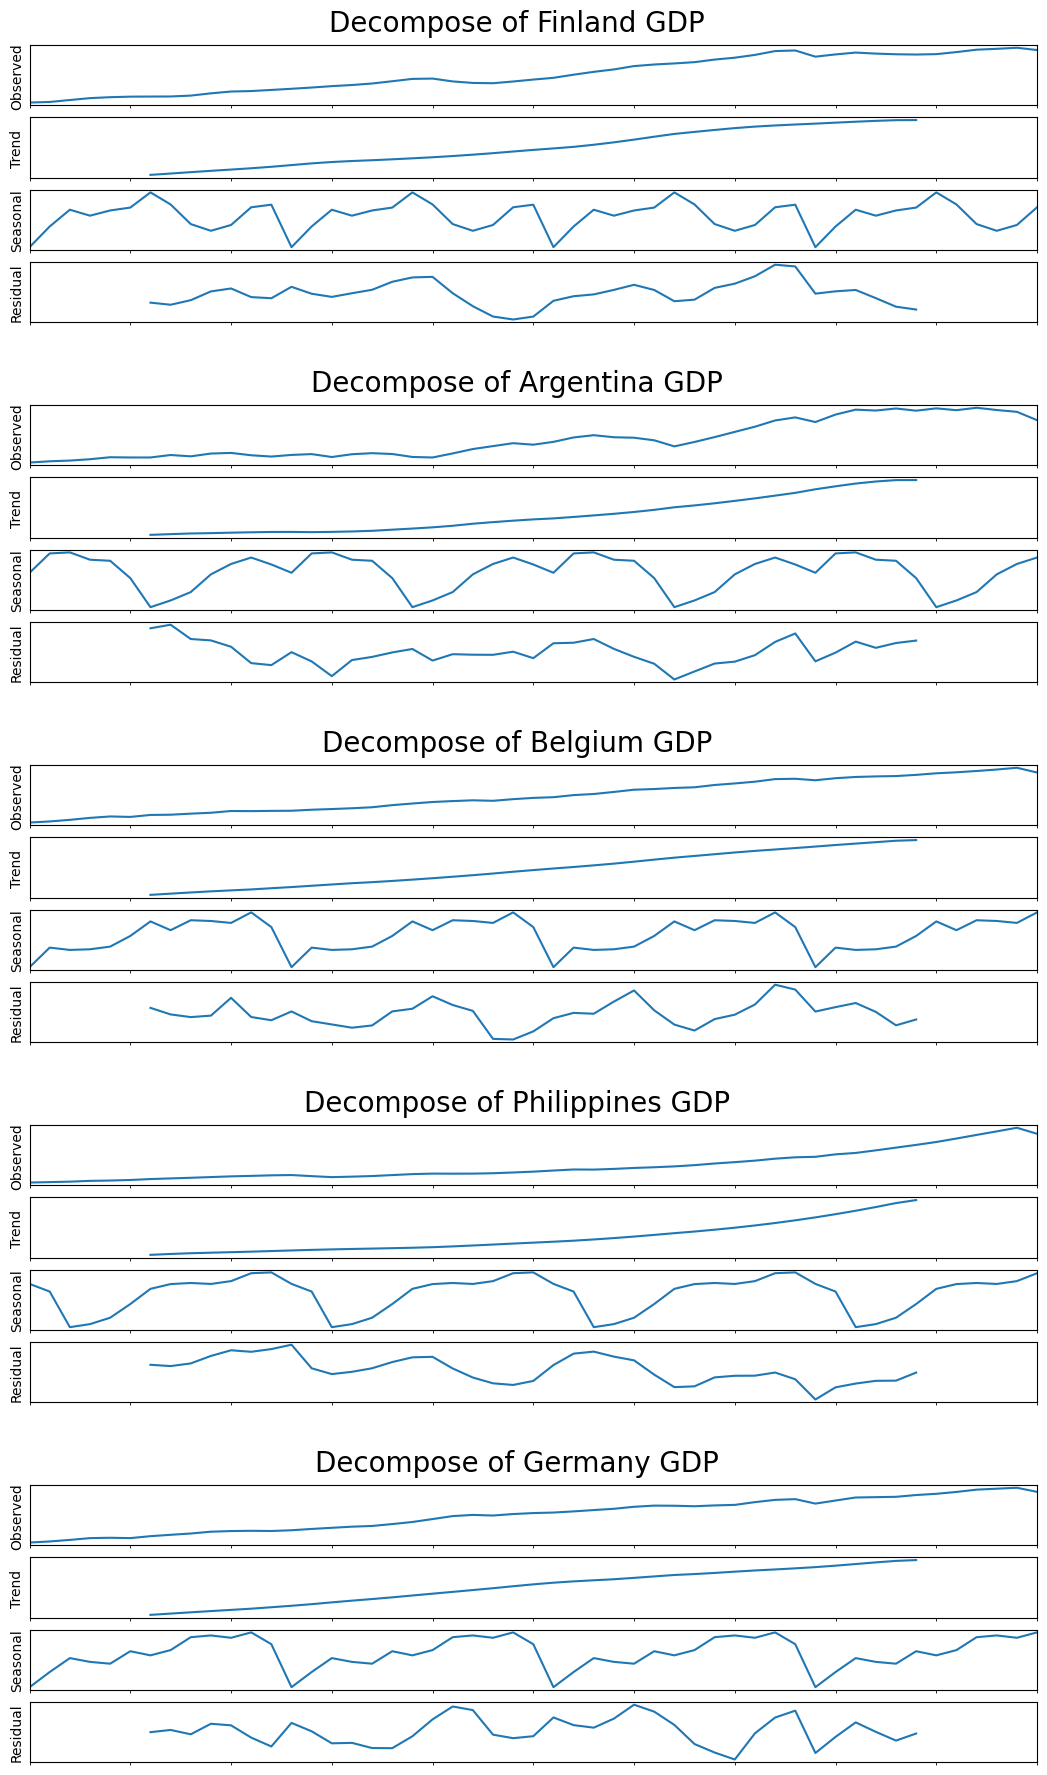

In [20]:
fig = plt.figure(figsize = (13, 18))

subfigs = fig.subfigures(5, 1)

for outerind, subfig in enumerate(subfigs.flat):
    decompose_data_add = seasonal_decompose(df_list[outerind]['GDP'], model = 'additive', period = seasons_list[idx])
    subfig.suptitle(f'Decompose of {nation_list[outerind]} GDP', fontsize = 20)
    axs = subfig.subplots(4, 1)
    f.plotseasonal(decompose_data_add, axs[:])
    for innerind, ax in enumerate(axs.flat):
        ax.set_xticks([])
        ax.set_yticks([])
 
plt.show()

# 9. Stationarity check

## 9.1 Visual stationarity

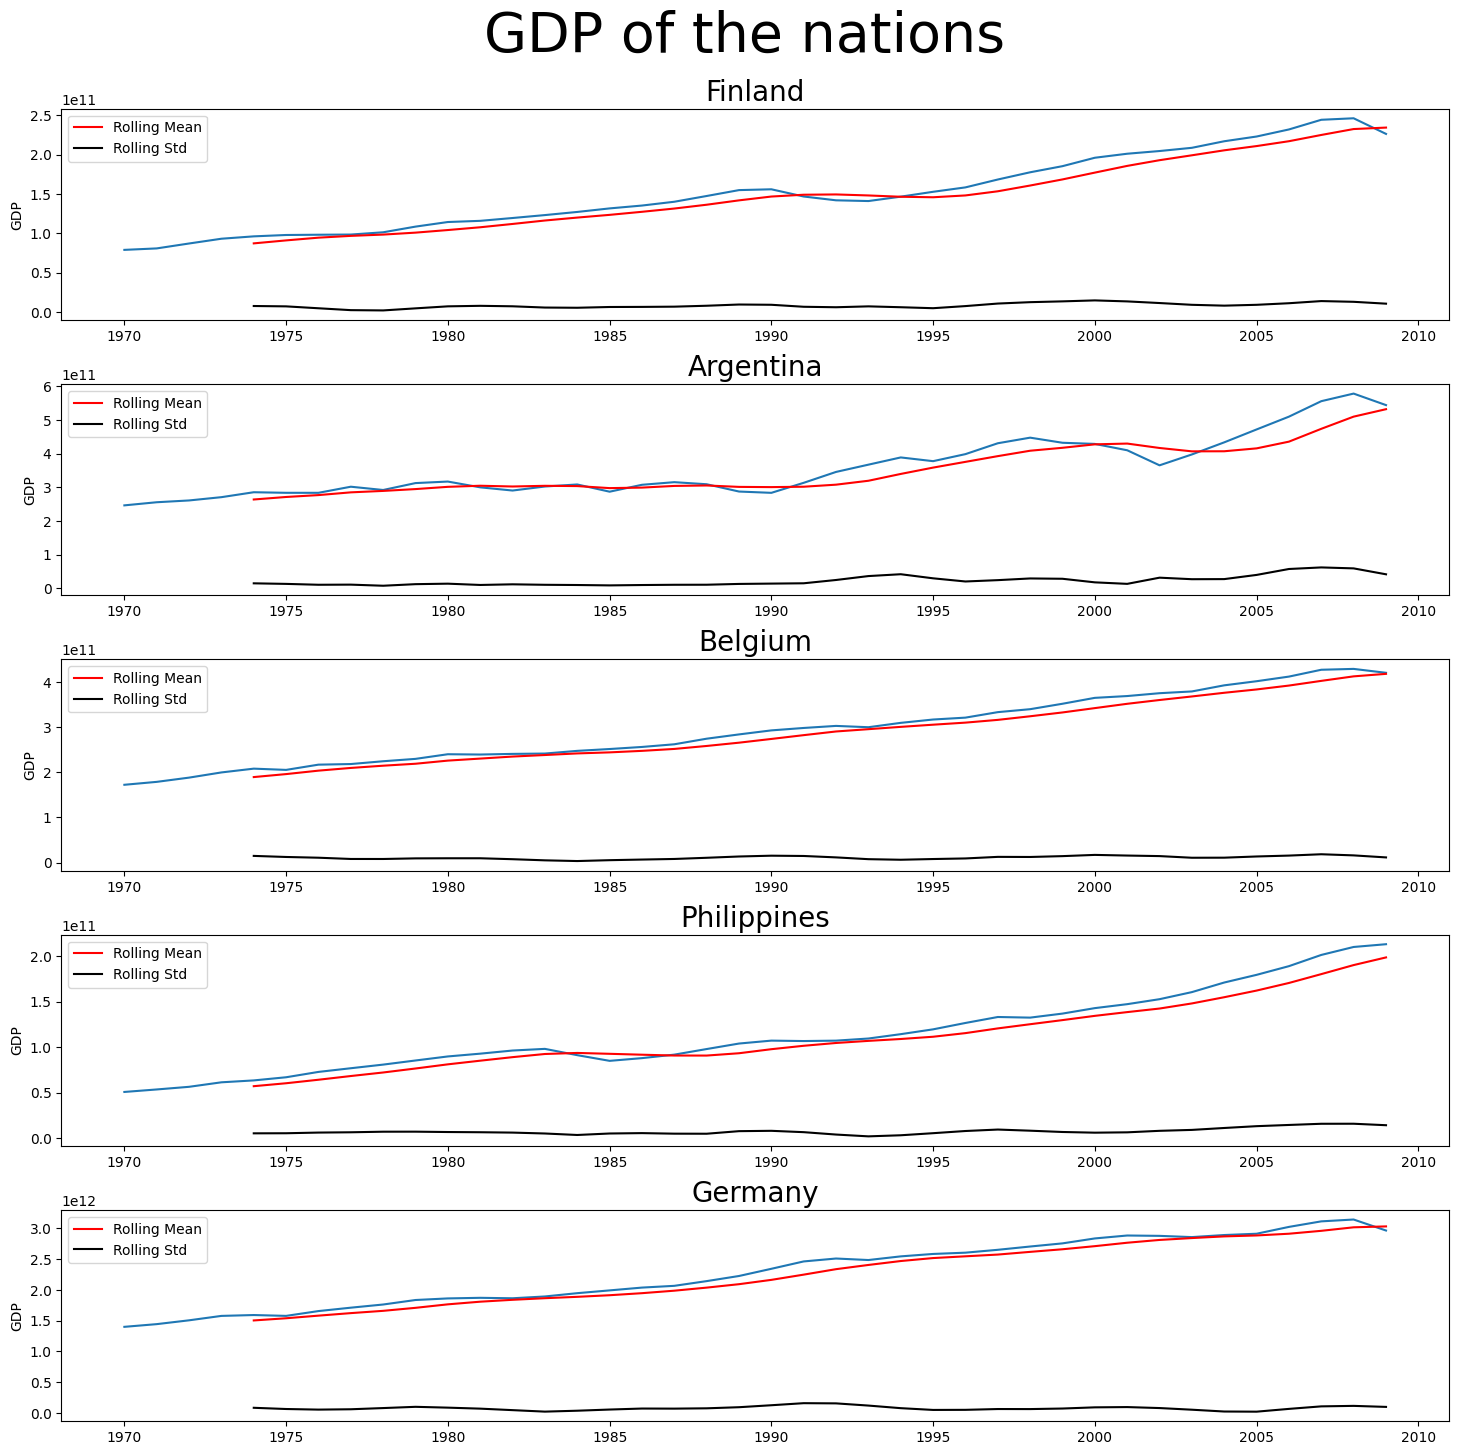

In [21]:
f.roll_mean_std_plot(df_train_test, nation_list, 5)

## 9.2 Statistics stationarity

In [22]:
f.check_stationarity(df_list, df_train_test, nation_list)

,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-0.466427,0.898403,No,0.871910,0.01,No
Argentina,1.126831,0.995439,No,0.819012,0.01,No
Belgium,0.165039,0.970231,No,0.899851,0.01,No
Philippines,1.649507,0.997999,No,0.862955,0.01,No
Germany,-1.036319,0.739788,No,0.901137,0.01,No


## 9.3 Achieving stationarity

df_train_test_log = {}

df_train_test_log = f.log_transform(df_train_test)

print('Stationarity check after log transform')
stationarity_df = f.check_stationarity(df_list, df_train_test_log, nation_list)
stationarity_df

In [23]:
df_train_test_log_dif = {}

for idx, nation in enumerate(nation_list):
    df_train_test_log_dif[nation] = f.difference(df_train_test, 1, nation)
    #print(f"Applied seasonal difference of {seasons_list[idx]} for {nation}'s GDP")

print('Stationarity check after first order differencing')
stationarity_df =  f.check_stationarity(df_list, df_train_test_log_dif, nation_list)
stationarity_df

Stationarity check after first order differencing


,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-3.358618,0.012453,Yes,0.076583,0.100000,Yes
Argentina,-3.981189,0.001512,Yes,0.134412,0.100000,Yes
Belgium,-4.769941,0.000062,Yes,0.108717,0.100000,Yes
Philippines,-3.280826,0.015758,Yes,0.432859,0.062992,Yes
Germany,-3.564720,0.006472,Yes,0.153294,0.100000,Yes


1. ADF AND KPSS indicate stationarity --> do nothing
2. ADF indicates stationarity and KPSS no --> first order differencing
3. KPSS indicates stationarity and ADF no --> detrend with seasonal_decompose
4. Both indicate non-stationarity --> first order differencing

df_train_test_log_dif_detrend = {}

for nation in nation_list:
    df_train_test_log_dif_detrend[nation] = f.difference(df_train_test_log, 1, nation)

print('Stationarity check after second order differencing')
f.check_stationarity(df_list, df_train_test_log_dif_detrend, nation_list)

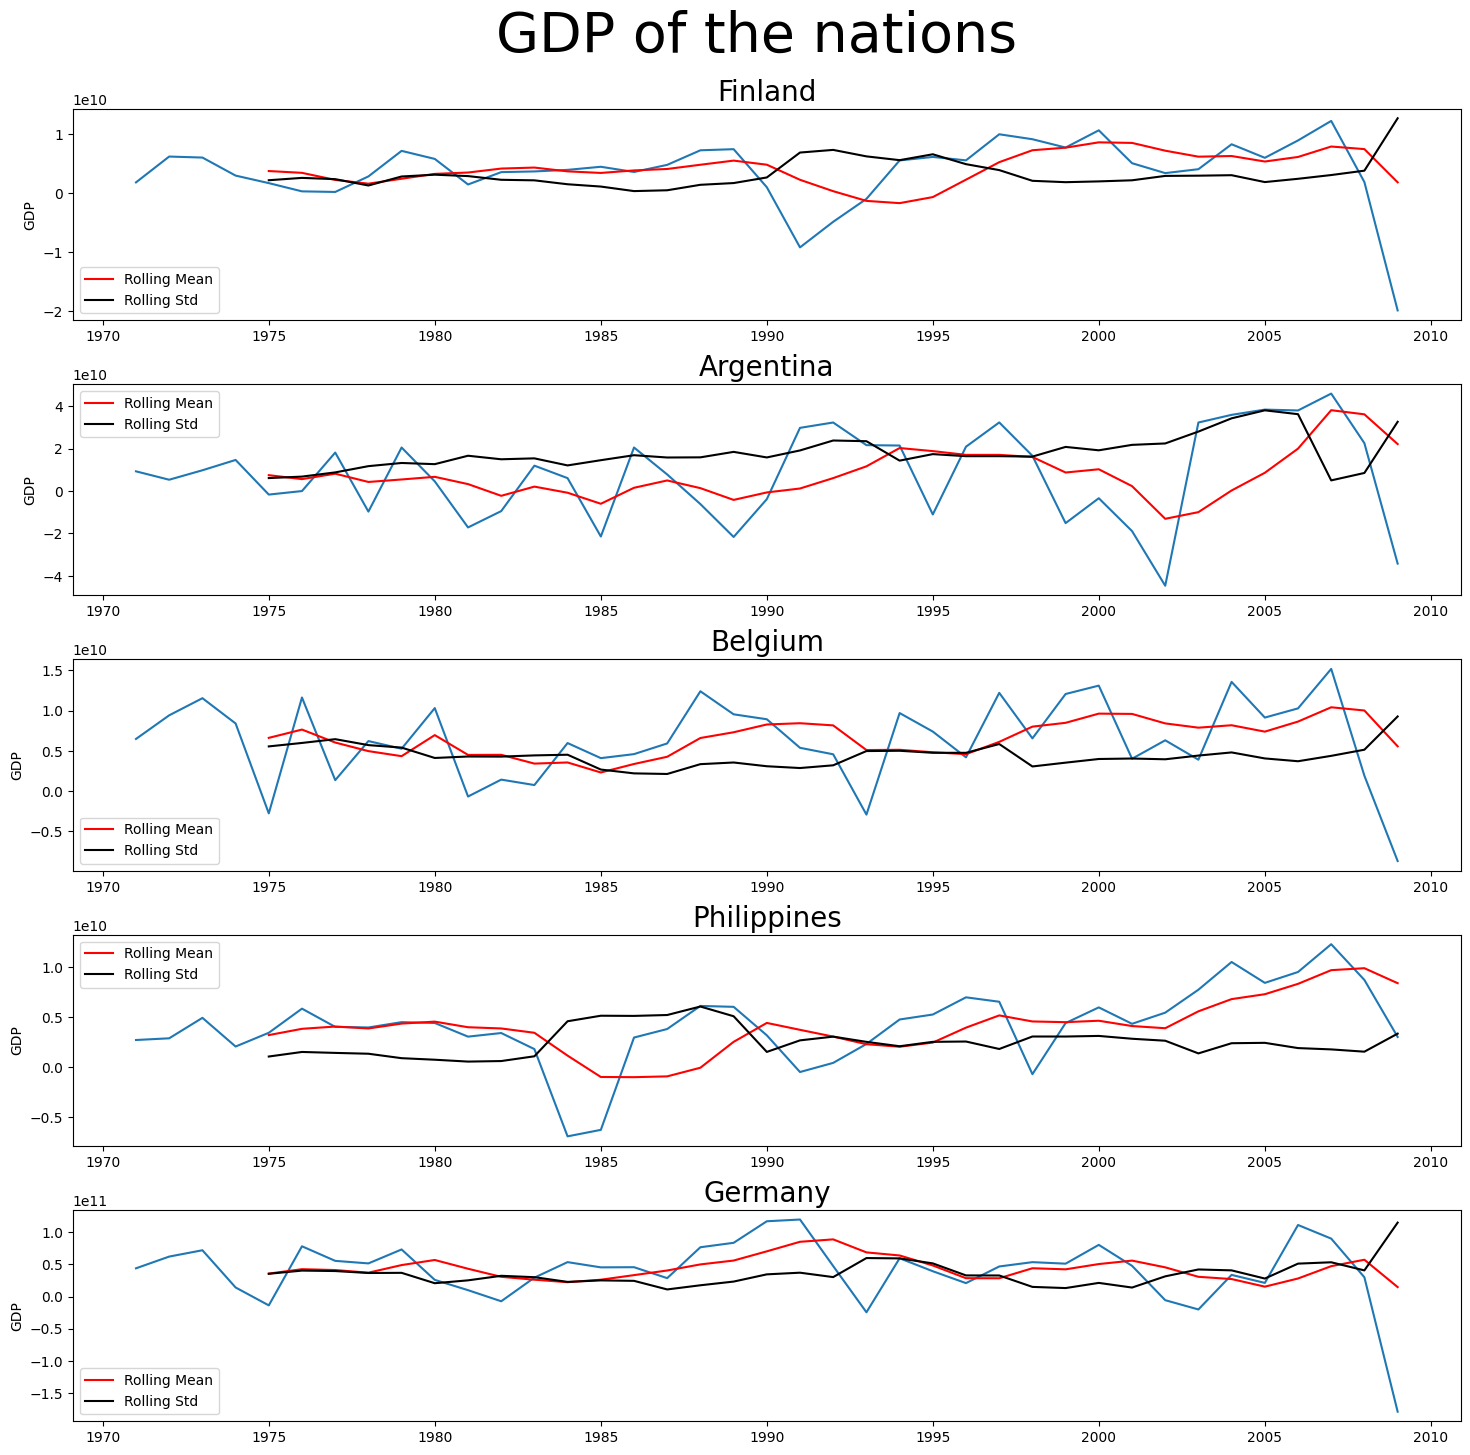

In [24]:
f.roll_mean_std_plot(df_train_test_log_dif, nation_list, 5)

## 9.4 ACF and PACF on differenced data

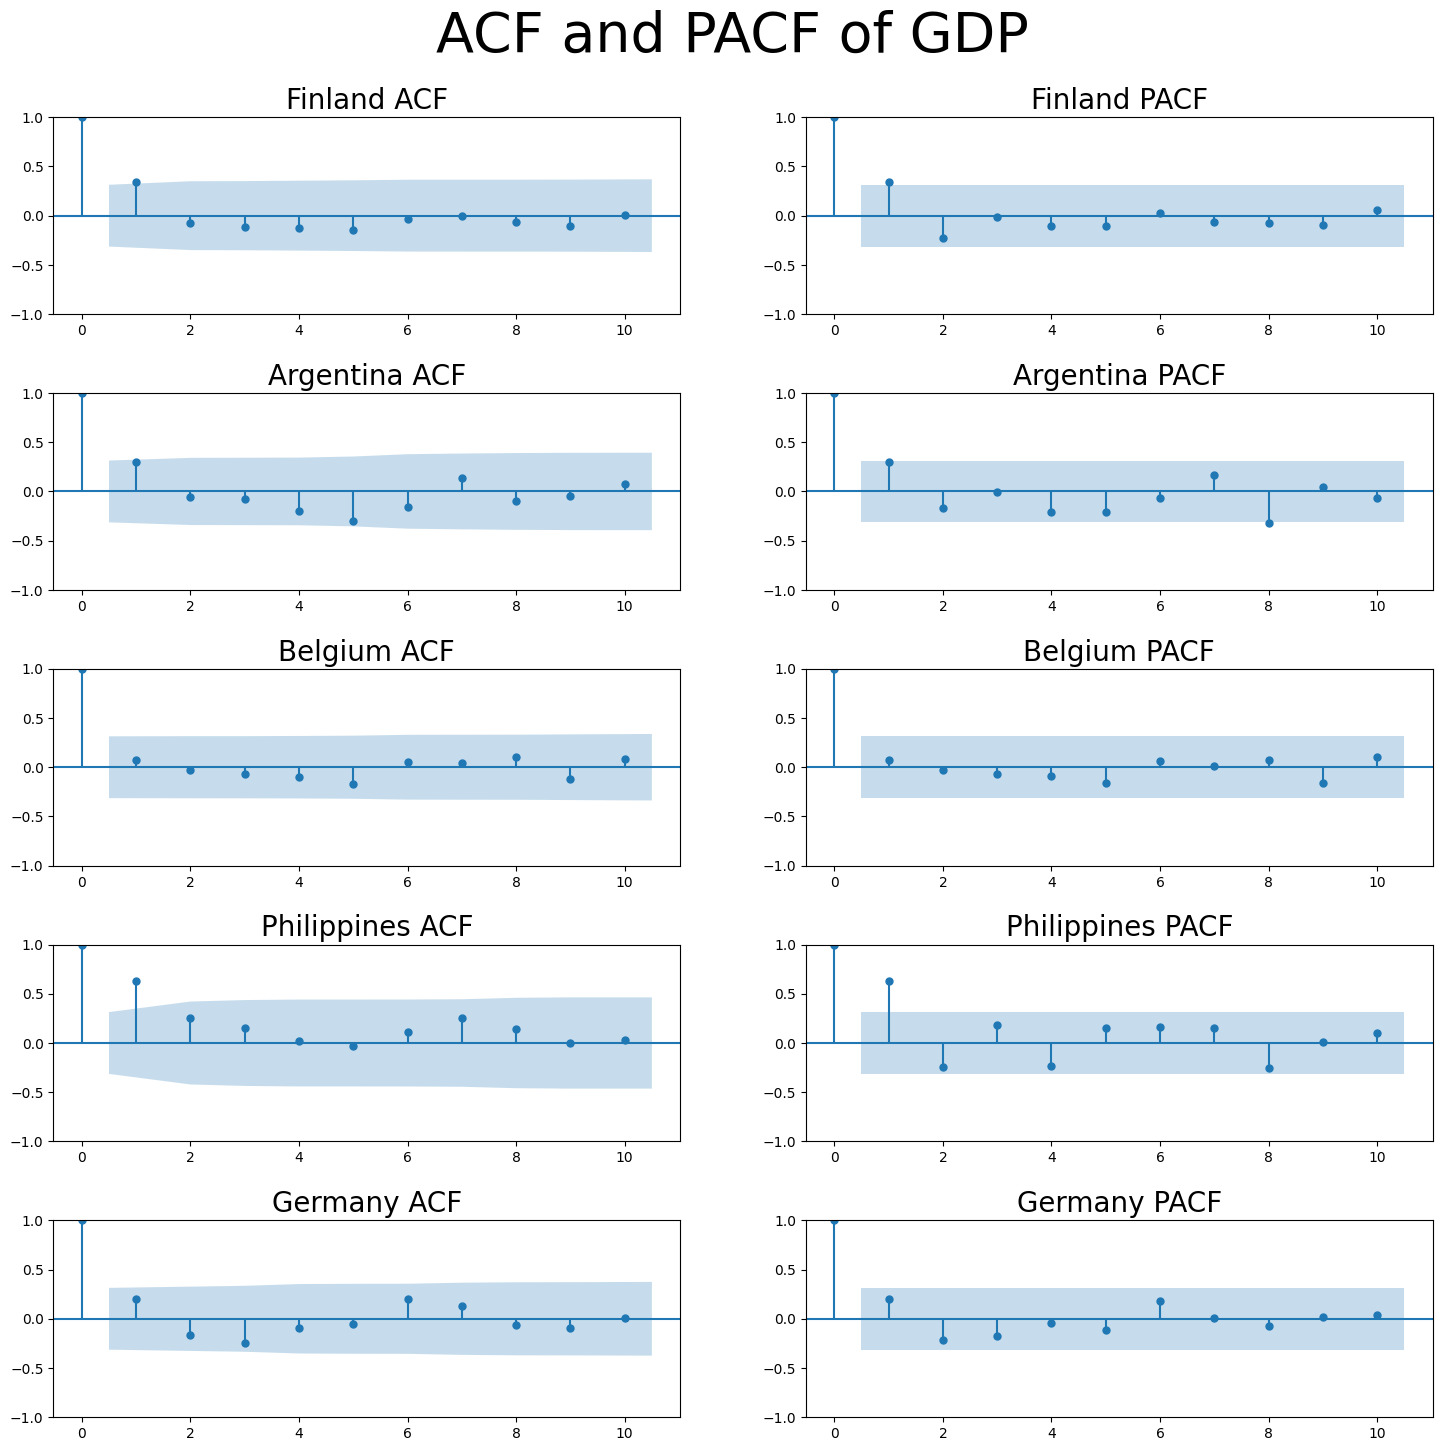

In [25]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))
plt.suptitle('ACF and PACF of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

for idx, df in enumerate(df_list):
    plot_acf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][0])
    ax[idx][0].set_title(f'{nation_list[idx]} ACF', fontsize = 20)
    plot_pacf(df_train_test_log_dif[nation_list[idx]][0]['GDP'], lags = 10, ax = ax[idx][1])
    ax[idx][1].set_title(f'{nation_list[idx]} PACF', fontsize = 20)

# 10. Models

## 10.0 Metrics

In [26]:
df_train_test['Finland'][1]

,Exports,Imports,Manufacturing,Gross_capital,GDP
2010-01-01,8.199109e+10,7.761804e+10,3.880181e+10,5.032391e+10,2.335528e+11
2011-01-01,8.365469e+10,8.243582e+10,3.882177e+10,5.602451e+10,2.395030e+11
2012-01-01,8.384988e+10,8.336190e+10,3.432562e+10,5.329620e+10,2.361558e+11
2013-01-01,8.433011e+10,8.346615e+10,3.460732e+10,5.101485e+10,2.340264e+11
2014-01-01,8.268426e+10,8.271753e+10,3.430011e+10,5.055459e+10,2.331724e+11
2015-01-01,8.300810e+10,8.434120e+10,3.442654e+10,5.090395e+10,2.344401e+11
2016-01-01,8.623992e+10,8.916675e+10,3.611454e+10,5.549770e+10,2.410313e+11
2017-01-01,9.384812e+10,9.301299e+10,3.879848e+10,5.840013e+10,2.487260e+11
2018-01-01,9.525885e+10,9.834317e+10,3.712934e+10,6.173398e+10,2.515663e+11
2019-01-01,1.017624e+11,1.006190e+11,3.828720e+10,5.889366e+10,2.549467e+11


In [27]:
metrics_list_of_df = f.create_metrics_df()

## 10.1 Arimax

### 10.1.1 Model identification/estimation

In [28]:
order_list, arima_model_list = f.arima_order(nation_list, df_train_test)

Finland
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-138.384, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-136.957, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-140.358, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-140.356, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-139.367, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-143.544, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-141.778, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-140.502, Time=0.23 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-138.627, Time=0.23 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-145.699, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-142.689, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-144.095, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-143.640, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-144.506, Time=0.17 sec
 ARIMA(1,2,3)(0,0,0)[0]  

In [29]:
order_list

[(0, 2, 2), (0, 2, 1), (0, 2, 1), (1, 2, 1), (0, 2, 0)]

### 10.1.2 Model diagnostics

Summary and diagnostics for Finland's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  79.849
Date:                Sat, 18 Jan 2025   AIC                           -145.699
Time:                        15:00:07   BIC                           -134.236
Sample:                             0   HQIC                          -141.620
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1423      0.111      1.281      0.200      -0.075       0.360
x2            -0.1001      0.092     -1.091      0.275      -0.280       0.080
x

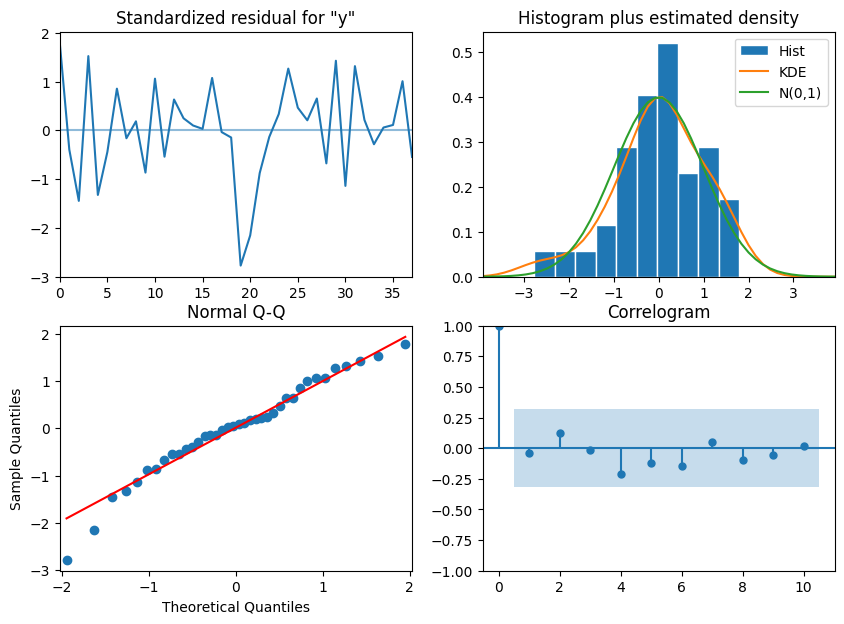

--------------------------------------
Summary and diagnostics for Argentina's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  53.483
Date:                Sat, 18 Jan 2025   AIC                            -94.967
Time:                        15:00:07   BIC                            -85.141
Sample:                             0   HQIC                           -91.471
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0241      0.073     -0.331      0.741      -0.167       0.119
x2             0.2141      0.080      2

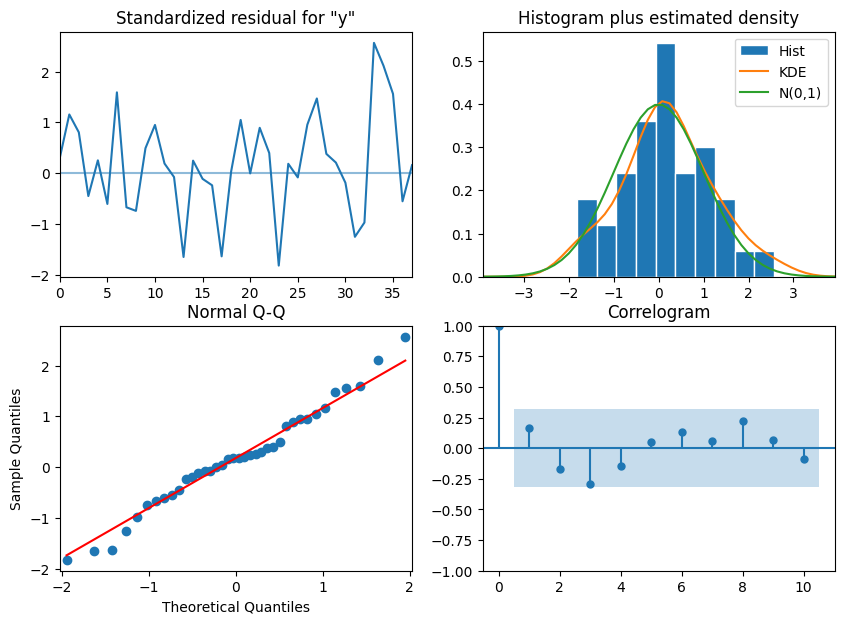

--------------------------------------
Summary and diagnostics for Belgium's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  88.283
Date:                Sat, 18 Jan 2025   AIC                           -164.565
Time:                        15:00:08   BIC                           -154.740
Sample:                             0   HQIC                          -161.069
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7543      0.183      4.123      0.000       0.396       1.113
x2            -0.6082      0.187     -3.2

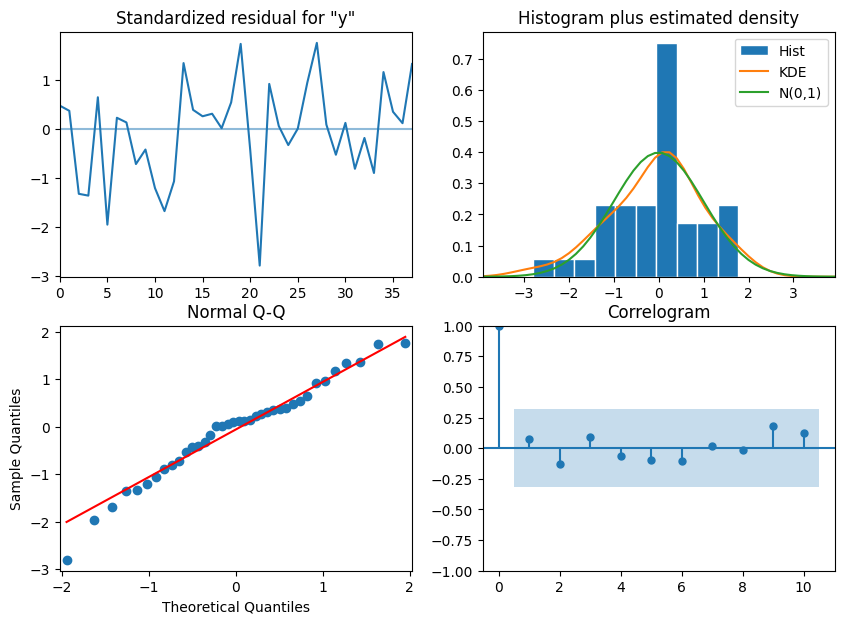

--------------------------------------
Summary and diagnostics for Philippines's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 2, 1)   Log Likelihood                  76.398
Date:                Sat, 18 Jan 2025   AIC                           -138.797
Time:                        15:00:08   BIC                           -127.334
Sample:                             0   HQIC                          -134.718
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3246      0.045      7.163      0.000       0.236       0.413
x2            -0.4002      0.094     

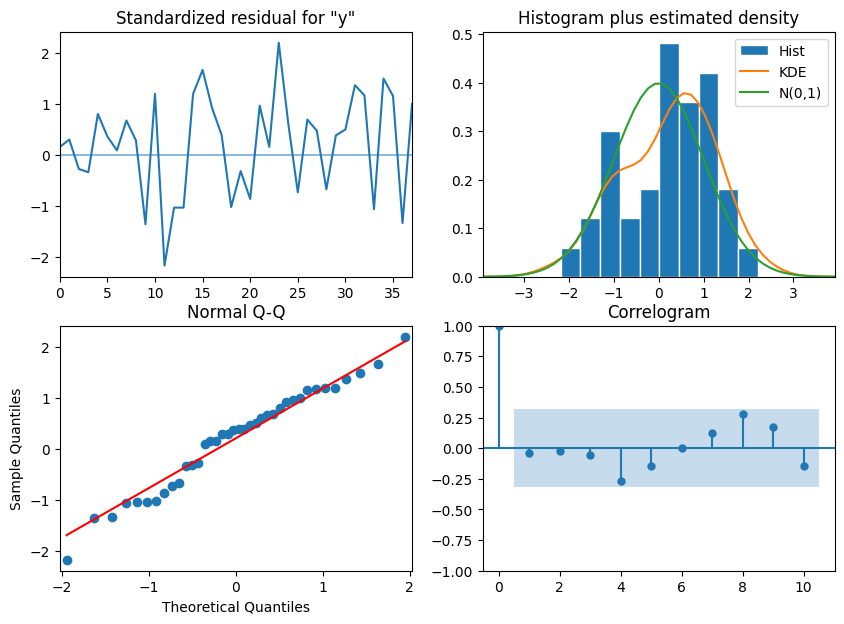

--------------------------------------
Summary and diagnostics for Germany's arima model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(0, 2, 0)   Log Likelihood                  82.233
Date:                Sat, 18 Jan 2025   AIC                           -154.465
Time:                        15:00:09   BIC                           -146.277
Sample:                             0   HQIC                          -151.552
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3725      0.094      3.972      0.000       0.189       0.556
x2            -0.2156      0.096     -2.2

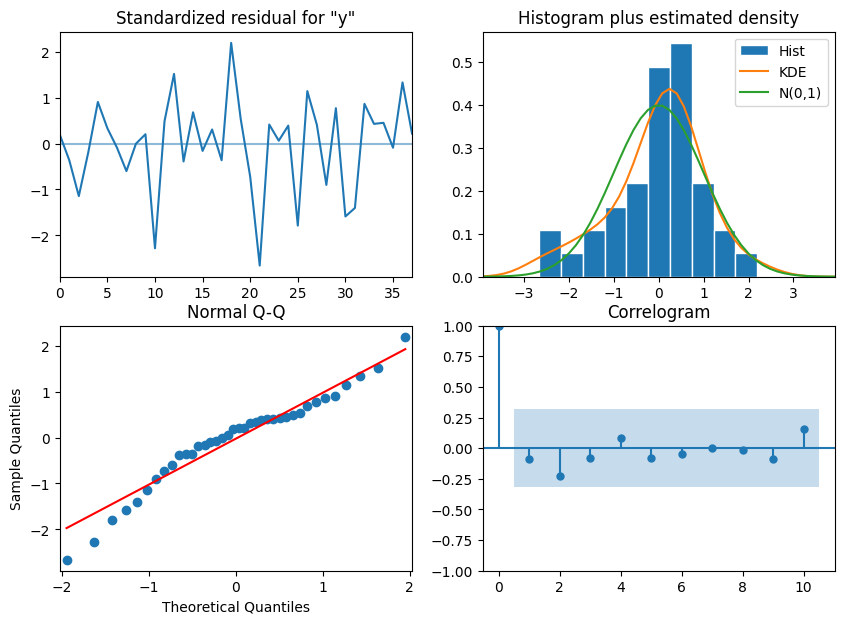

--------------------------------------


In [30]:
f.arima_diagnostics(arima_model_list, nation_list)

In [31]:
f.arima_res_stats(arima_model_list, nation_list, df_train_test)

DW statistic for standardized residuals of Finland's arima model: 2.062663442865388


,lb_stat,lb_pvalue
1,0.055371,0.813968
2,0.773623,0.679219
3,0.777937,0.854737
4,2.856289,0.582156
5,3.553776,0.615267
6,4.577669,0.599002
7,4.714306,0.694781
8,5.186518,0.737467
9,5.360011,0.801864
10,5.373239,0.864893


JB p-value for standardized residuals of Finland's arima mode: (useless, too few samples) 0.23260500158664985
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Argentina's arima model: 1.6096621979733563


,lb_stat,lb_pvalue
1,1.227183,0.267956
2,2.536779,0.281284
3,6.585215,0.086362
4,7.630185,0.106104
5,7.778035,0.168900
6,8.690692,0.191735
7,8.850267,0.263586
8,11.404711,0.179805
9,11.679790,0.231969
10,12.122776,0.276924


JB p-value for standardized residuals of Argentina's arima mode: (useless, too few samples) 0.9212474429557511
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Belgium's arima model: 1.7909414154671057


,lb_stat,lb_pvalue
1,0.248943,0.617821
2,0.999362,0.606724
3,1.398328,0.705927
4,1.601909,0.808449
5,2.074567,0.838734
6,2.647689,0.851587
7,2.655700,0.914924
8,2.666789,0.953499
9,4.508025,0.874917
10,5.387663,0.863825


JB p-value for standardized residuals of Belgium's arima mode: (useless, too few samples) 0.42001512634142324
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Philippines's arima model: 1.9645234518163182


,lb_stat,lb_pvalue
1,0.050749,0.821765
2,0.081155,0.960235
3,0.224860,0.973480
4,3.484179,0.480288
5,4.529826,0.475903
6,4.530844,0.605228
7,5.270957,0.626935
8,9.249328,0.321702
9,10.812317,0.288793
10,11.850335,0.295198


JB p-value for standardized residuals of Philippines's arima mode: (useless, too few samples) 0.6312759484851778
-------------------------------------------------------------------------------
DW statistic for standardized residuals of Germany's arima model: 2.1689375363949264


,lb_stat,lb_pvalue
1,0.316932,0.573457
2,2.553102,0.278998
3,2.864190,0.413042
4,3.198206,0.525221
5,3.495727,0.624034
6,3.588139,0.732209
7,3.588148,0.825803
8,3.598244,0.891433
9,4.046185,0.908346
10,5.414448,0.861831


JB p-value for standardized residuals of Germany's arima mode: (useless, too few samples) 0.1871173383736967
-------------------------------------------------------------------------------


### 10.1.3 Model prediction

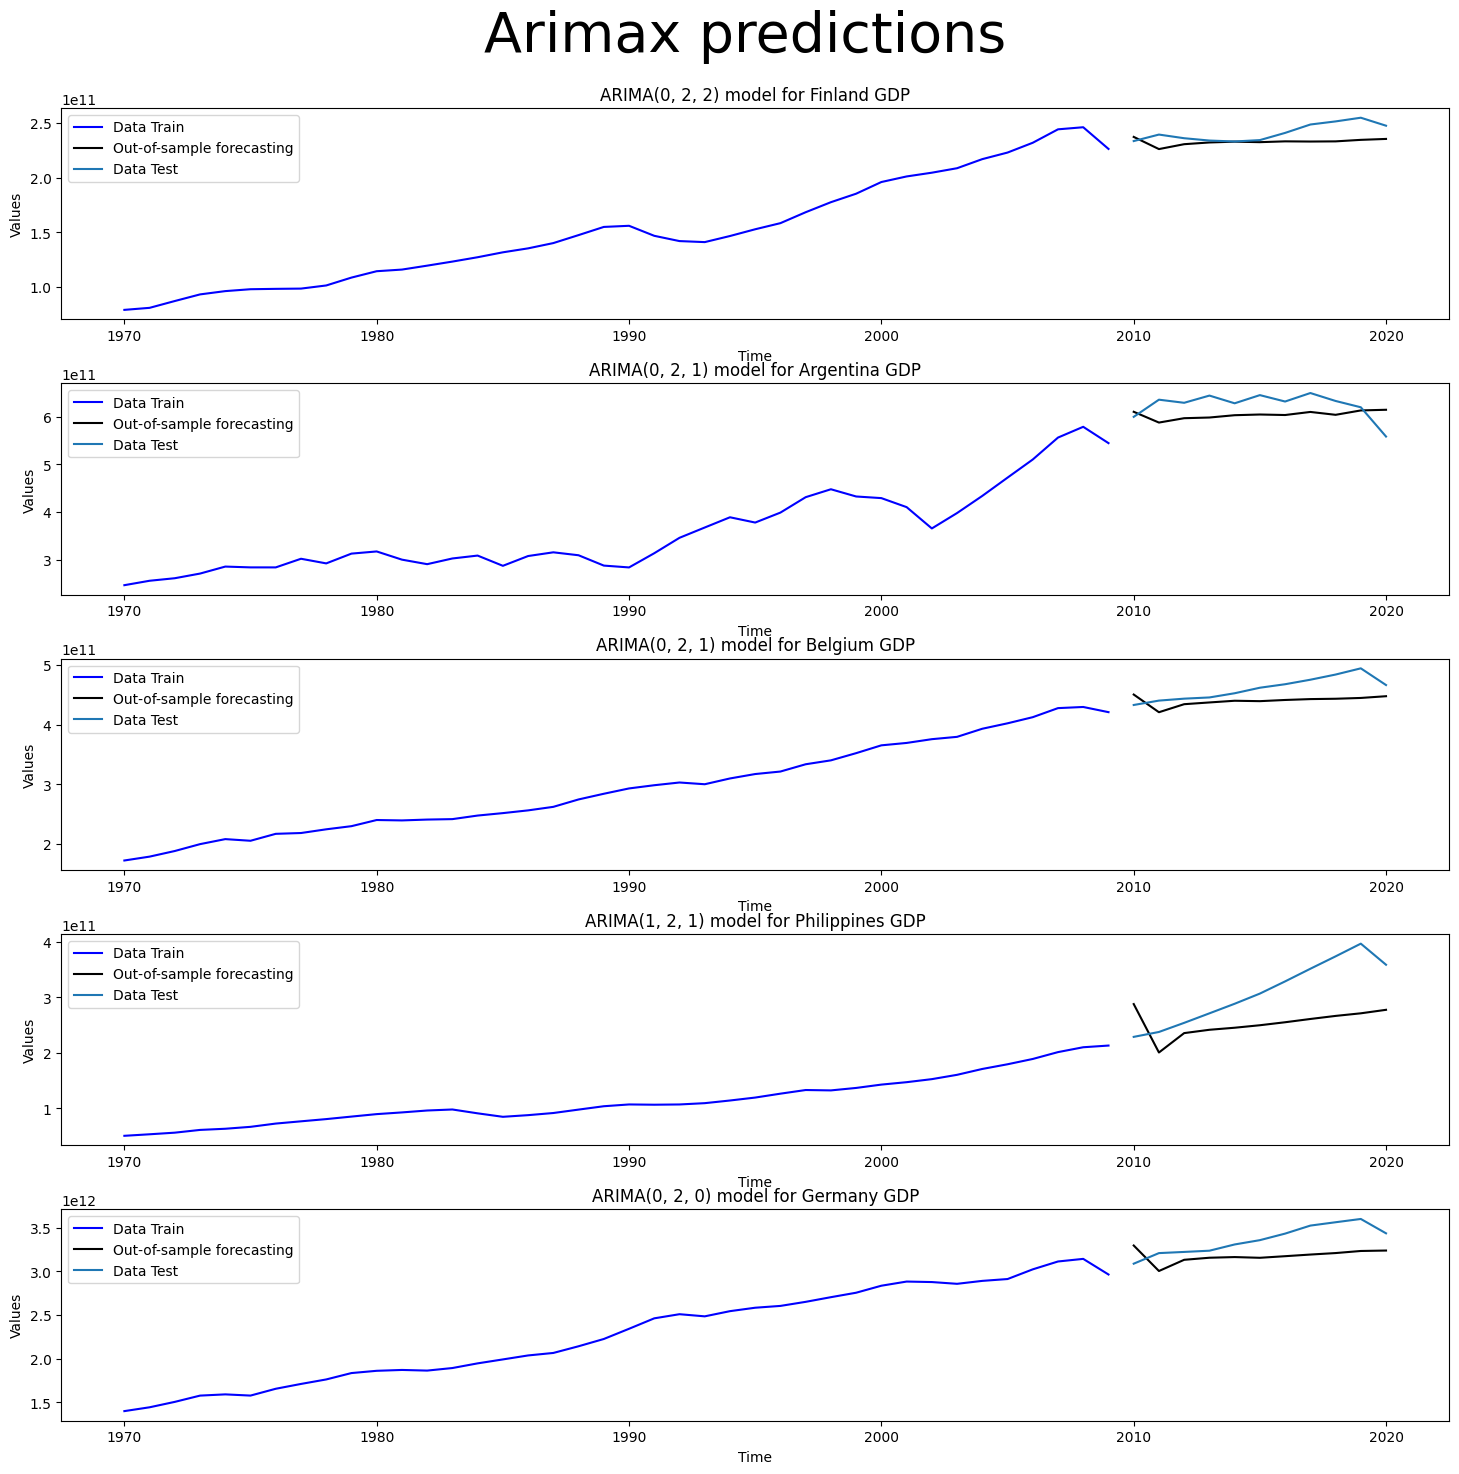

In [32]:
arima_prediction_list = f.arima_prediction_plot(arima_model_list, nation_list, order_list, df_train_test)

In [33]:
metrics_list_of_df = f.add_metrics('ARIMAX', arima_model_list, metrics_list_of_df, df_train_test, nation_list, arima_prediction_list)

In [34]:
for idx, df in enumerate(metrics_list_of_df):
    print(nation_list[idx])
    display(df)

Finland


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-145.698941,9129753769.205559,11379151749.569609,0.03703


Argentina


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-94.966798,32925103988.582153,35997371805.990555,0.052888


Belgium


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-164.565158,23411215857.833481,26486951102.288128,0.049975


Philippines


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-138.796641,65550276737.694511,72878818049.257492,0.203683


Germany


,Model_name,AIC,MAE,RMSE,MAPE
0,ARIMAX,-154.46529,221597836767.304688,240551789171.569183,0.065097


## 10.2 ETS

In [78]:
nation_list

['Finland', 'Argentina', 'Belgium', 'Philippines', 'Germany']

finland MAM 8 false

argentina MAM 7 true

belgium AAM 13 false

philippines MMM 8 false

germany AMM 13 true


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.58310D+01    |proj g|=  8.99900D-01

At iterate    1    f=  2.55504D+01    |proj g|=  7.03582D-01

At iterate    2    f=  2.54865D+01    |proj g|=  7.51397D-01

At iterate    3    f=  2.54391D+01    |proj g|=  7.00036D-01

At iterate    4    f=  2.53455D+01    |proj g|=  2.34884D+00

At iterate    5    f=  2.52657D+01    |proj g|=  2.03987D+00

At iterate    6    f=  2.51659D+01    |proj g|=  7.41549D-01

At iterate    7    f=  2.51248D+01    |proj g|=  6.74856D-01

At iterate    8    f=  2.50745D+01    |proj g|=  7.82519D-01

At iterate    9    f=  2.50532D+01    |proj g|=  1.18892D+00

At iterate   10    f=  2.50153D+01    |proj g|=  8.41530D-01

At iterate   11    f=  2.50052D+01    |proj g|=  3.21922D-01

At iterate   12    f=  2.50038D+01    |proj g|=  2.36005D-01

At iterate   13    f=  2.5

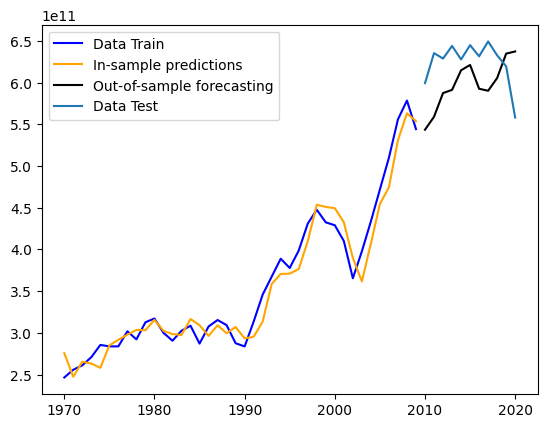

In [151]:
model = ETSModel(
    df_train_test['Argentina'][0]['GDP'],
    error = 'mul',
    trend = 'add',
    seasonal = 'mul',
    #seasonal = None,
    seasonal_periods = 7,
    damped_trend = True
).fit()

pred = model.get_prediction(start = '2010', end = '2020')
df = pred.summary_frame()
forecasts = pd.DataFrame(df['mean'])

tab = {'Param Name': model.param_names, 'Values': model.params}
tab = pd.DataFrame(tab)
#display(tab)

#plt.figure(figsize = (15, 5))
plt.plot(df_train_test['Argentina'][0]['GDP'], '-b', label = 'Data Train')
plt.plot(model.fittedvalues, 'orange', label = 'In-sample predictions')
plt.plot(forecasts, '-k', label = 'Out-of-sample forecasting')
plt.plot(df_train_test['Argentina'][1]['GDP'], label = 'Data Test')
plt.legend()
plt.show()

## 10.3 Vector Autoregressive